In [41]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl2
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [42]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:], gray=True)

In [43]:
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.3, img.shape)

In [44]:
lmbda = 0.04
opt = tvl2.TVL2Denoise.Options({'Verbose': True, 'MaxMainIter': 200,
                'gEvalY': False, 'AutoRho': {'Enabled': True}})

In [45]:
b = tvl2.TVL2Denoise(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  5.72e+03  2.12e+03  8.98e+04  2.86e-01  2.14e+00  1.80e-01
   1  5.31e+03  1.04e+03  1.07e+05  1.11e-01  1.99e-01  1.80e-01
   2  5.29e+03  9.30e+02  1.09e+05  7.32e-02  7.91e-02  1.35e-01
   3  5.29e+03  9.17e+02  1.09e+05  5.31e-02  4.03e-02  1.35e-01
   4  5.29e+03  9.09e+02  1.09e+05  3.97e-02  2.94e-02  1.54e-01
   5  5.29e+03  9.13e+02  1.09e+05  3.01e-02  2.17e-02  1.79e-01
   6  5.29e+03  9.10e+02  1.09e+05  2.31e-02  1.65e-02  2.12e-01
   7  5.29e+03  9.12e+02  1.09e+05  1.78e-02  1.28e-02  2.50e-01
   8  5.29e+03  9.11e+02  1.09e+05  1.38e-02  1.00e-02  2.95e-01
   9  5.29e+03  9.12e+02  1.09e+05  1.08e-02  7.97e-03  3.46e-01
  10  5.29e+03  9.11e+02  1.09e+05  8.41e-03  6.34e-03  4.02e-01
  11  5.29e+03  9.12e+02  1.09e+05  6.61e-03  5.11e-03  4.64e-01
  12  5.29e+03  9.11e+02  1.09e+05  5.20e-03  4.09e-03  5.27e-01
  13  5.29e+03  9.12e+02 

In [46]:
print("TVL2Denoise solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL2Denoise solve time: 42.43 s
Noisy image PSNR:     9.16 dB
Denoised image PSNR: 11.31 dB


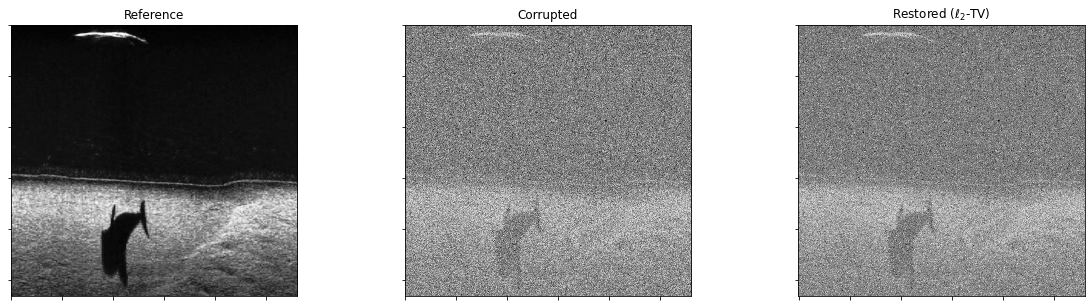

In [47]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_2$-TV)', fig=fig)
fig.show()

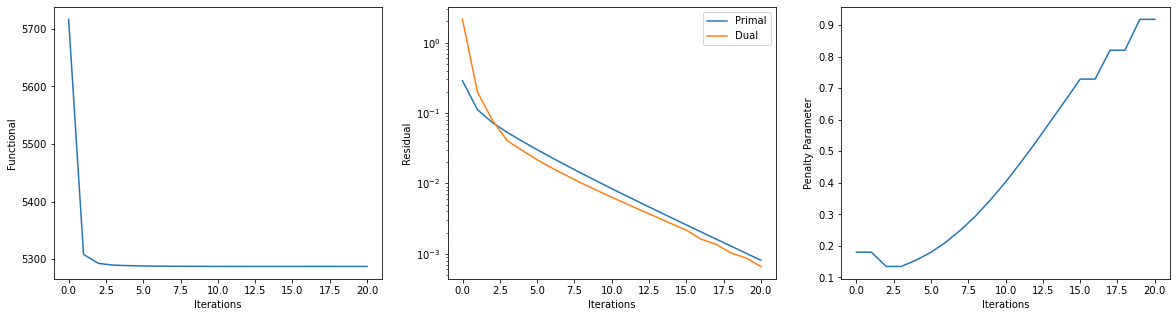

In [48]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [49]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.1377401124098187
